In [1]:
import unittest
import os
import sys
import pathlib
import urllib
import shutil
import re
import zipfile

import numpy as np
import torch
import matplotlib.pyplot as plt

import torchvision
%load_ext autoreload
%autoreload 2

test = unittest.TestCase()
plt.rcParams.update({'font.size': 12})
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [2]:
import util.plot as plot
import util.download

DATA_DIR = pathlib.Path.home().joinpath('.pytorch-datasets')

In [29]:
import torchvision.transforms as T
from torchvision.datasets import ImageFolder

im_size = 128
tf = T.Compose([
    # Resize to constant spatial dimensions
    T.Resize((im_size, im_size)),
    # PIL.Image -> torch.Tensor
    T.ToTensor(),
    # Dynamic range [0,1] -> [-1, 1]
    T.Normalize(mean=(.5,.5,.5), std=(.5,.5,.5)),
])

# CIFAR

In [30]:
cifar_ds = torchvision.datasets.CIFAR10(DATA_DIR.joinpath('cifar'), download=True, transform=tf)
cifar_dl = torch.utils.data.DataLoader(cifar_ds, batch_size=4, shuffle=True, num_workers=1)

Files already downloaded and verified


Found 50000 images in dataset folder.


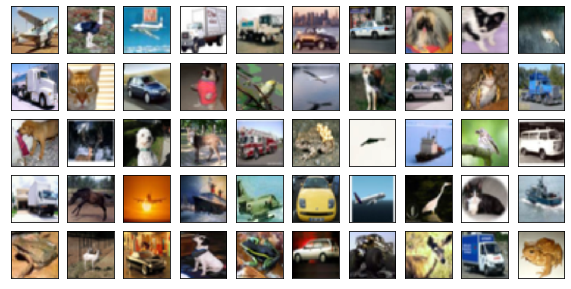

In [31]:
_ = plot.dataset_first_n(cifar_ds, 50, figsize=(10,5), nrows=5)
print(f'Found {len(cifar_ds)} images in dataset folder.')

In [34]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# get some random training images
itr = iter(cifar_dl)
images, labels = next(itr)
labels, classes[labels[0]]

(tensor([5, 3, 3, 6]), 'dog')

# MNIST

In [41]:
im_size = 64
tfmnist = T.Compose([
    T.Resize((im_size, im_size)),
    # PIL.Image -> torch.Tensor
    T.ToTensor(),
    T.Lambda(lambda x: x.repeat(3, 1, 1)),
    # Dynamic range [0,1] -> [-1, 1]
    T.Normalize(mean=(.5,.5,.5), std=(.5,.5,.5)),
    
])

mnist_ds = torchvision.datasets.MNIST(DATA_DIR.joinpath('mnist'), download=True, transform=tfmnist)
mnist_dl = torch.utils.data.DataLoader(mnist_ds, batch_size=4, shuffle=True, num_workers=1)

Found 60000 images in dataset folder.


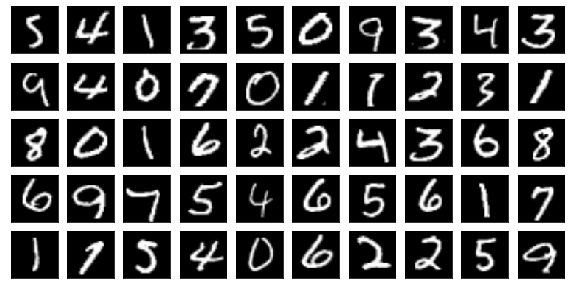

In [43]:
_ = plot.dataset_first_n(mnist_ds, 50, figsize=(10,5), nrows=5)
print(f'Found {len(mnist_ds)} images in dataset folder.')

# LSUN

data - https://www.yf.io/p/lsun
categories -http://dl.yf.io/lsun/objects/

VERY LARGE

In [48]:
# DATA_URL = 'http://dl.yf.io/lsun/objects/cat.zip'
# _, dataset_dir = util.download.download_data(out_path=DATA_DIR, url=DATA_URL, extract=True, force=False)

In [ ]:
# ds_lsun = ImageFolder(os.path.dirname(dataset_dir), tf)
# _ = plot.dataset_first_n(ds_lsun, 50, figsize=(10,5), nrows=5)
# print(f'Found {len(ds_gwb)} images in dataset folder.')

# Celeb Faces
http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

In [50]:
# DATA_URL = 'https://drive.google.com/open?id=0B7EVK8r0v71pWEZsZE9oNnFzTm8'
# _, dataset_dir = util.download.download_data(out_path=DATA_DIR, url=DATA_URL, extract=True, force=False)

# George Bush

In [3]:
DATA_URL = 'http://vis-www.cs.umass.edu/lfw/lfw-bush.zip'
_, dataset_dir = util.download.download_data(out_path=DATA_DIR, url=DATA_URL, extract=True, force=False)

File C:\Users\Noam\.pytorch-datasets\lfw-bush.zip exists, skipping download.
Extracting C:\Users\Noam\.pytorch-datasets\lfw-bush.zip...
Extracted 531 to C:\Users\Noam\.pytorch-datasets\lfw/George_W_Bush


In [9]:
ds_gwb = ImageFolder(os.path.dirname(dataset_dir), tf)

Found 530 images in dataset folder.


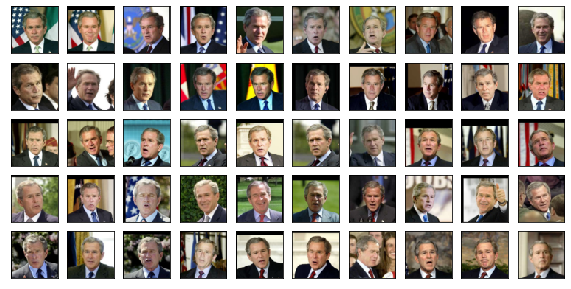

In [10]:
_ = plot.dataset_first_n(ds_gwb, 50, figsize=(10,5), nrows=5)
print(f'Found {len(ds_gwb)} images in dataset folder.')